## Time Series Analysis
### 4.  Can we predict when California will return to normal?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

#### Clean Data

In [3]:
# Cleaning Cases Data
case_data = pd.read_csv("Data/covid19cases_test.csv")
case_data.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/23/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,106.0,3.0,11251.0
1,4/23/2021,Alpine,County,1117.0,0.0,0.0,NaN,NaN,0.0,0.0,2.0
2,4/23/2021,Amador,County,38531.0,0.0,0.0,NaN,NaN,4.0,0.0,487.0
3,4/23/2021,Butte,County,217769.0,0.0,0.0,NaN,NaN,16.0,0.0,454.0
4,4/23/2021,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,5.0,0.0,135.0


In [4]:
#Reformat date column, fill NaN, filter out bad rows, rename columns
case_data['date']=pd.to_datetime(case_data['date'])
case_data = case_data.fillna(0)
end_date = "2021/04/01"
#The state of CA has special restrictions for counties with populations under 100k. Filter those out.
clean_case = case_data.loc[(case_data['date']<end_date) & 
                          (case_data.area != 'Out of state') & 
                          (case_data.area != 'California')& 
                          (case_data.area != 'Unknown')&
                          (case_data.population >= 100000)] 
clean_case = clean_case[['date', 'area', 'population', 'positive_tests']]
clean_case = clean_case.rename(columns ={'date':'Date','area': 'County','population':'Population','positive_tests':'Positive Tests'} )
#Create column for cases per 100k
clean_case["Cases Per 100k"] = round(clean_case["Positive Tests"] / clean_case["Population"] * 100000,2)
clean_case.head()
clean_case.to_csv("case_data_cleaned.csv")

In [5]:
clean_case.head()

,Date,County,Population,Positive Tests,Cases Per 100k
1403,2021-03-31,Alameda,1685886.0,123.0,7.30
1406,2021-03-31,Butte,217769.0,11.0,5.05
1410,2021-03-31,Contra Costa,1160099.0,91.0,7.84
1412,2021-03-31,El Dorado,193098.0,20.0,10.36
1413,2021-03-31,Fresno,1032227.0,94.0,9.11


In [142]:
#Total CA case count at bottom
California_Total_Case=clean_case.groupby(['Date'])
Cases_Per_100=California_Total_Case['Cases Per 100k'].sum() / California_Total_Case['Population'].sum() * 100000
California_df = pd.DataFrame({"Cases Per 100k":Cases_Per_100})
California_df['Counts']=np.arange(len(California_df))
California_df.head()
California_df.to_csv("California_cases.csv")

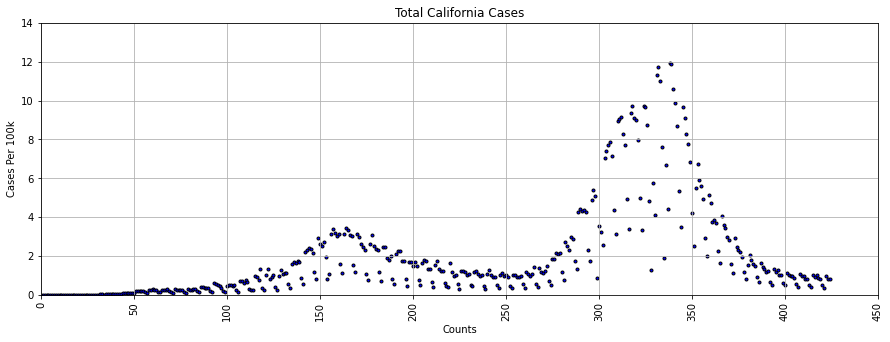

In [166]:
#Scatter Plot California
plt.figure(figsize=(15,5))
plt.scatter(x=California_df["Counts"],y=California_df["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Total California Cases")
plt.ylim(0, 14)
plt.xlim(0,450)
plt.xlabel("Counts")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Data/Total_California_Cases.png")

In [6]:
#Ventura County
vtacounty_case=clean_case.loc[(clean_case['County'] == 'Ventura')]
vtacounty_case=vtacounty_case.sort_values(['Date'])
vtacounty_case.head()
vtacounty_case.to_csv("VTA_County.csv")

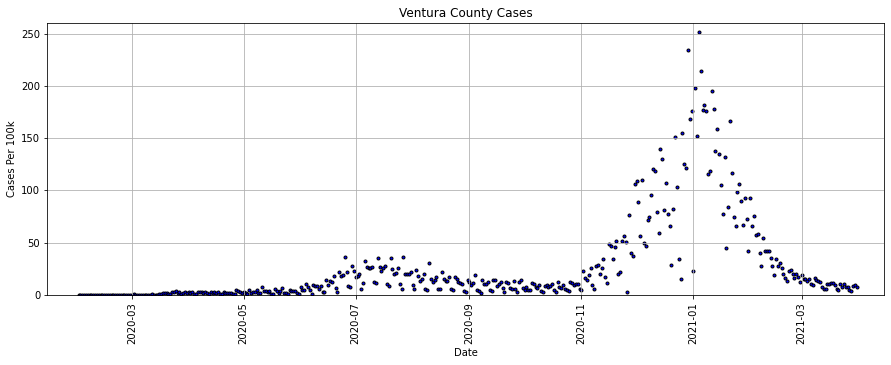

In [145]:
#Scatter Plot VTA
plt.figure(figsize=(15,5))
plt.scatter(x=vtacounty_case["Date"],y=vtacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Ventura County Cases")
plt.ylim(0, 260)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Data/Ventura_County_Cases.png")

In [48]:
#San Bernadino County
sbcounty_case=clean_case.loc[(clean_case['County'] == 'San Bernadino')]
sbcounty_case=lassencounty_case.sort_values(['Date'])
sbcounty_case.head()
sbcounty_case.to_csv("San_Bernadino_County.csv")

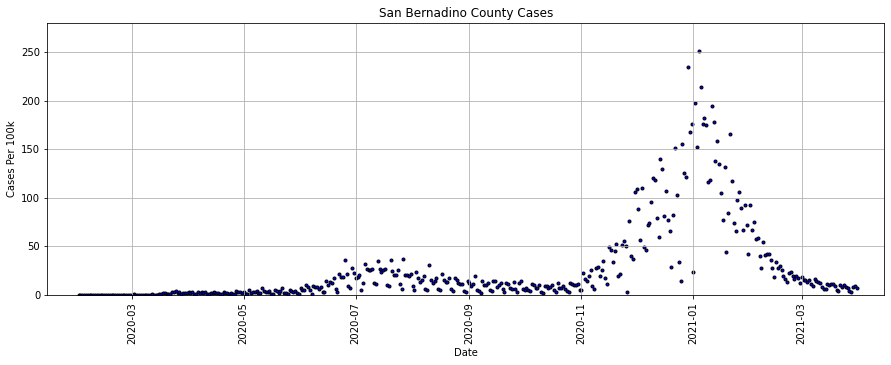

In [146]:
#Scatter Plot San Bernadino
#plt.figure(figsize=(10,5))
plt.figure(figsize=(15,5))
plt.scatter(x=vtacounty_case["Date"],y=vtacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("San Bernadino County Cases")
plt.ylim(0, 280)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Data/San_Bernadino_Cases.png")

In [55]:
#Napa County
napacounty_case=clean_case.loc[(clean_case['County'] == 'Napa')]
napacounty_case=napacounty_case.sort_values(['Date'])
napacounty_case.head()
napacounty_case.to_csv("Napa_County.csv")

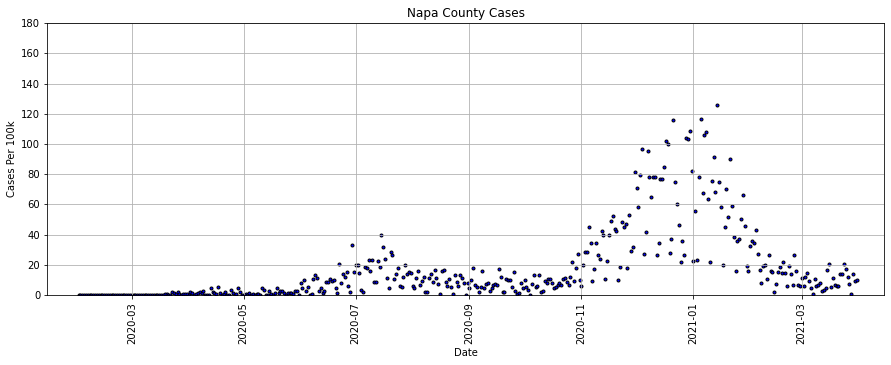

In [152]:
#Scatter Plot Napa
#plt.figure(figsize=(10,5))
plt.figure(figsize=(15,5))
plt.scatter(x=napacounty_case["Date"],y=napacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Napa County Cases")
plt.ylim(0, 180)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Data/Napa_Cases.png")

In [13]:
#LA County
lacounty_case=clean_case.loc[(clean_case['County'] == 'Los Angeles')]
lacounty_case=lacounty_case.sort_values(['Date'])
lacounty_case['Counts']=np.arange(len(lacounty_case))
lacounty_case.head()
lacounty_case.to_csv("LA_County.csv")

In [14]:
lacounty_case.head()

,Date,County,Population,Positive Tests,Cases Per 100k,Counts
27286,2020-02-01,Los Angeles,10257557.0,10.0,0.10,0
27225,2020-02-02,Los Angeles,10257557.0,1.0,0.01,1
27164,2020-02-03,Los Angeles,10257557.0,1.0,0.01,2
27103,2020-02-04,Los Angeles,10257557.0,0.0,0.00,3
27042,2020-02-05,Los Angeles,10257557.0,0.0,0.00,4


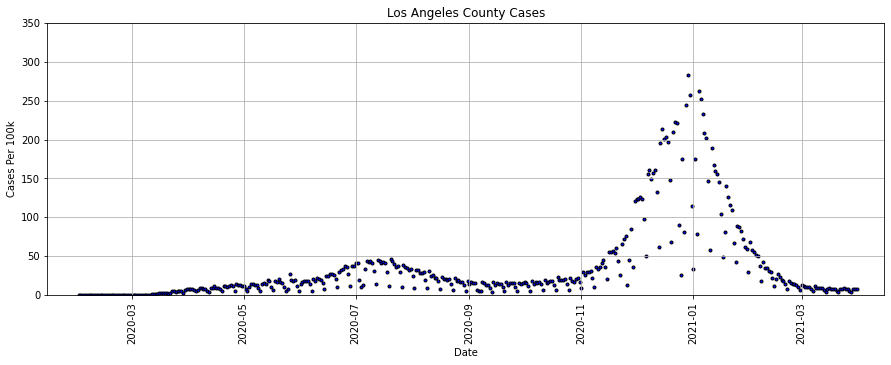

In [148]:
#Scatter Plot LA
plt.figure(figsize=(15,5))
plt.scatter(x=lacounty_case["Date"],y=lacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Los Angeles County Cases")
plt.ylim(0, 350)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
plt.savefig("Data/LA_Cases.png")

The r value is: 0.42168857988887604


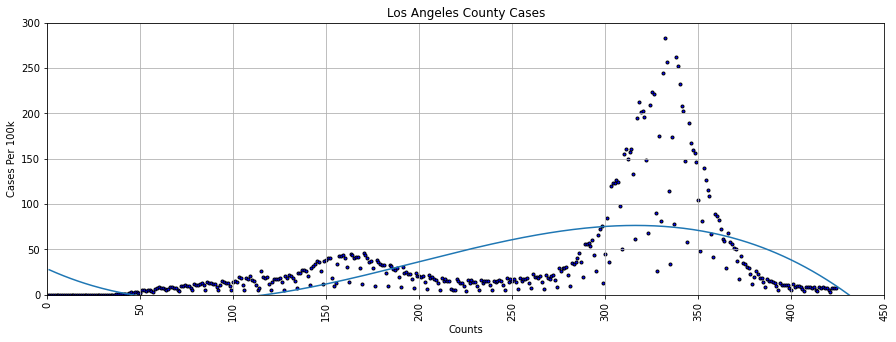

<Figure size 432x288 with 0 Axes>

In [169]:
#Polynomial Regression
# Add the linear regression equation and line to plot
#(slope, intercept,rvalue, pvalue, stderr)= linregress(list(lacounty_case["Counts"]),list(lacounty_case["Cases Per 100k"]))
#regress_values=lacounty_case["Counts"]* slope + intercept
#line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.figure(figsize=(15,5))
plt.scatter(lacounty_case["Counts"],lacounty_case["Cases Per 100k"],color="b",marker='.',edgecolors="black")
mymodel1 = np.poly1d(np.polyfit(lacounty_case["Counts"], lacounty_case["Cases Per 100k"], 3))
myline = np.linspace(1, 450, 350)
plt.plot(myline, mymodel1(myline))
#plt.plot(lacounty_case["Counts"], regress_values, color= "r")
#plt.annotate(line_eq,(5,320), fontsize=14)
plt.title("Los Angeles County Cases")
plt.ylim(0, 300)
plt.xlim(0,450)
plt.xlabel("Counts")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig("Data/LA_Polynomial_Regression.png")

In [110]:
Jan2020=300
prediction=mymodel1(Jan2020)
print(prediction)

75.31425841352738


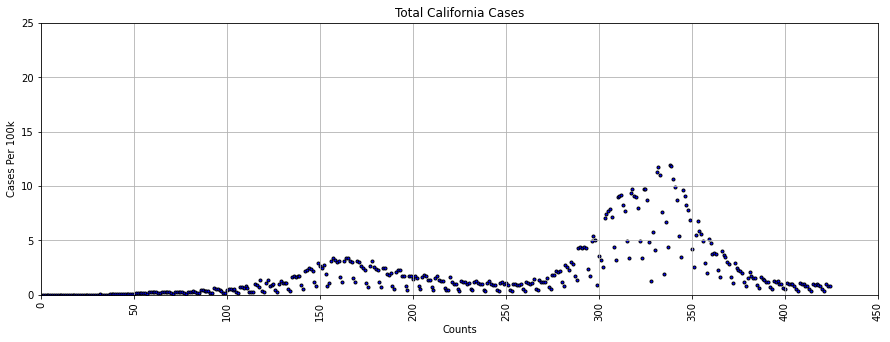

In [82]:
#Scatter Plot California
plt.figure(figsize=(15,5))
plt.scatter(x=California_df["Counts"],y=California_df["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Total California Cases")
plt.ylim(0, 25)
plt.xlim(0,450)
plt.xlabel("Counts")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()

The r value is: 0.42168857988887604


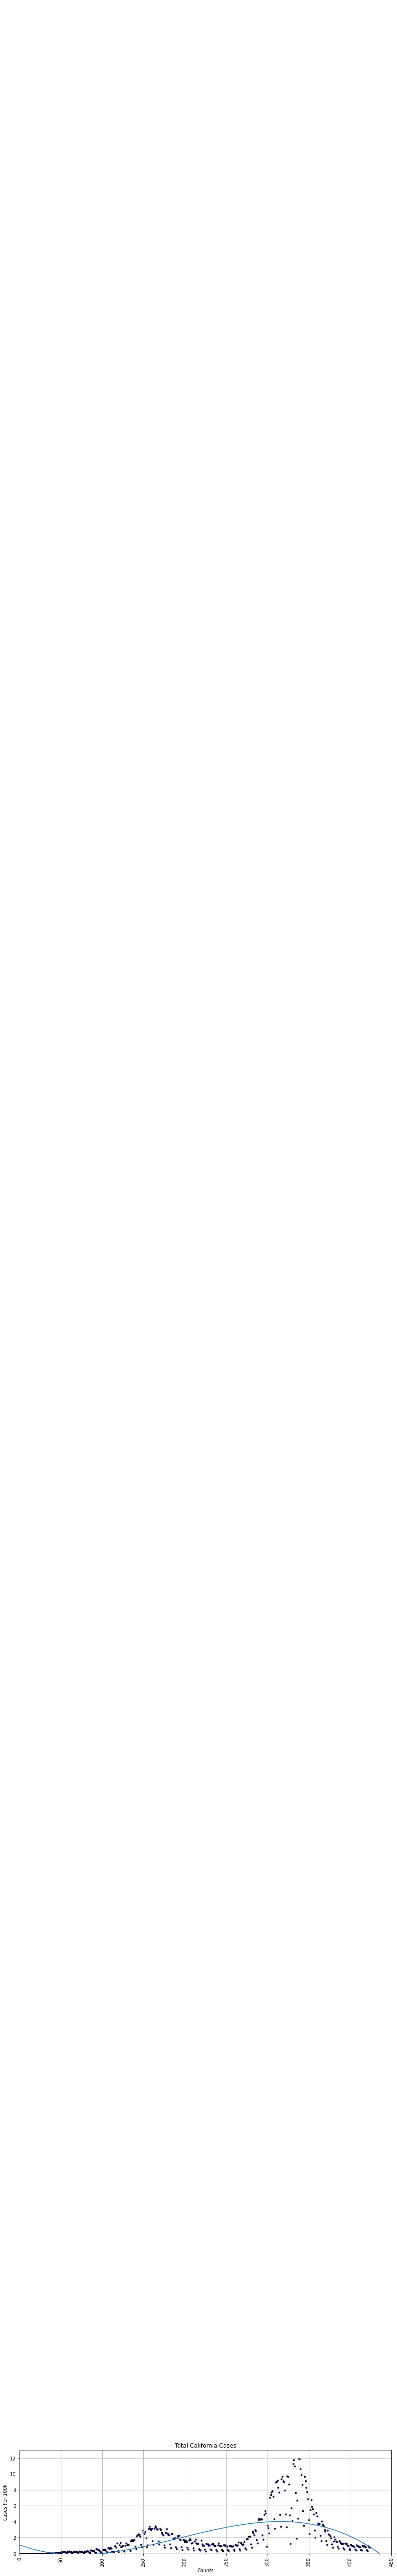

<Figure size 432x288 with 0 Axes>

In [168]:
plt.figure(figsize=(14,4))
plt.scatter(California_df["Counts"],California_df["Cases Per 100k"],color="b",marker='.',edgecolors="black")
mymodel2 = np.poly1d(np.polyfit(California_df["Counts"], California_df["Cases Per 100k"], 3))
myline = np.linspace(1, 450, 350)
plt.plot(myline, mymodel(myline))
plt.annotate(line_eq,(5,320), fontsize=14)
plt.title("Total California Cases")
plt.ylim(0, 13)
plt.xlim(0,450)
plt.xlabel("Counts")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig("Data/California_Polynomial_Regression.png")

In [141]:
#Polynomial regression predictions
#Day 435.2 is April 11
zero_cases = 435.52
prediction=round(mymodel(zero_cases),2)
print(prediction)

0.0
